TASK B
---
A). The strategy to handle test instances of opposite classes that have the same probability for the positive class in the pseudocode is quite straight forward. The method uses a threshold, which is the previous probability, in which it then adds a point to the ROC curve if the previous probability and the current probability are not the same. This skips any instances in which it has the same probability as the last instance, which is quite bad. The reason why is because we are skipping over so many test instances in which we could train our model with.

B). The strategy I implemented to handle test instances of opposite classes that have the same probability for the positive class in the pseudocode is also quite straight forward. Instead of skipping each instance which has the same probability as the last instance, I sort the list in which we have tested_positive and tested_negative and made sure all the tested_positive is above all the tested_negative. Then I used a threshold inbetween each posterior positive probability to see if we should accept it or reject it. (Sadly I have way to much things to do so I only had enough time to implement this strategy therefore the stragety coded below is from strategy A, the strategy proposed in B would be much more efficient for the ROC curve). 

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

class ROC:
    
    #Task B
    def __init__(self, Probs, TrueClass):
        #constructor for the ROC class
        #Probs contains the estimated probabilities of the test instances for the positive class
        self.Probs = Probs
        #TrueClass contains the true class of the test instances
        self.TrueClass = TrueClass
        
    #Task B  
    #computes the TPr and FPr coordinates of the ROC curve from the positive-class probabilities and true classes of the test instances
    def compute_ROC_coordinates(self, Probs, TrueClass):
        ROC_coordinates_X = []
        ROC_coordinates_Y = []
        FP = 0
        TP = 0
        P = 0
        N = 0
        previous_prob = -10000000
        
        #calculates how many positives and negatives is in the data
        for i in range(len(TrueClass)):
            if(TrueClass[i] == "tested_positive"):
                P += 1
            else: N+= 1
        
        
        for i in range((P+N)):
            if(Probs.iloc[i] != previous_prob):

                ROC_coordinates_X.append(FP/N)
                ROC_coordinates_Y.append(TP/P)
                previous_prob = Probs.iloc[i]
        
            if(TrueClass.iloc[i] == "tested_positive"):
                TP += 1
            else: FP += 1
               
        ROC_coordinates_X.append(FP/N)
        ROC_coordinates_Y.append(TP/P) 
        
        return ROC_coordinates_X, ROC_coordinates_Y
    
    #TASK C
    #plots the ROC curve 
    # (the method assumes that we first run method compute_ROC_coordinates)
    #ROC Curve: Plot of False Positive Rate (x) vs. True Positive Rate (y).
    def plot_ROC(self, ROC_coordinates_X, ROC_coordinates_Y):
        plt.plot(ROC_coordinates_X, ROC_coordinates_Y, '-o')
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
        return
    
    #TASK D
    #computes the area under curve (AUC) of the ROC curve from the positive-class probabilities and true classes of the test instances 
    #(for the sake of computational efficiency, the method assumes that we first run method compute_ROC_coordinates)
    def compute_AUCROC(self, PositiveClass, TrueClass):
        
        P = 0
        N = 0
        #calculates how many positives and negatives is in the data
        for i in range(len(TrueClass)):
            if(TrueClass[i] == "tested_positive"):
                P += 1
            else: N+= 1
        
        FP = 0
        TP = 0
        FPprev = 0
        TPprev = 0
        Fprev = -1000000
        A = 0
        
        for i in range(len(TrueClass)):
            if(PositiveClass.iloc[i] != Fprev):
                
                base = abs(FP-FPprev)
                avgHeight = (TP+TPprev)/2   
                areaoftrap = base*avgHeight
                
                A = A + areaoftrap
                Fprev = PositiveClass.iloc[i]
                FPprev = FP
                TPprev = TP
                
            if(TrueClass.iloc[i] == "tested_positive"):
                TP += 1
            else: FP += 1
            
        base = abs(1-FPprev)
        avgHeight = (1+TPprev)/2   
        areaoftrap = base*avgHeight
        
        A = A + areaoftrap
        A = A/(P*N)
        return A
    
    
    

TASK C
---

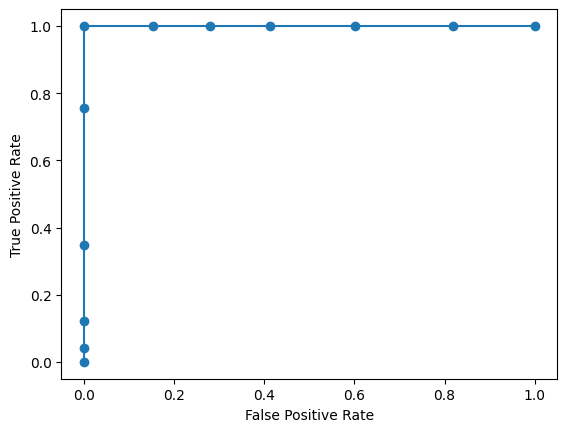

AUC Score:  1.2320536606250891


In [16]:
from sklearn.neighbors import KNeighborsClassifier

dataDiabetes = pd.read_csv('diabetes.csv')
#Y is the data for tested_positive and tested_negative
Y = dataDiabetes['class']
X = dataDiabetes.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=1)
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, Y_train)


ProbabilisticClass = pd.DataFrame(data=neigh.predict_proba(X_test)[:,1])
ProbabilisticClass.columns = ['Positive Class']

y_scores = ProbabilisticClass

ProbabilisticClass['True Class'] = pd.DataFrame(data=neigh.predict(X_test))

ProbabilisticClass = ProbabilisticClass.sort_values(by = 'Positive Class', ascending = False)
y_scores =y_scores.sort_values(by = 'Positive Class', ascending = False)


TrueClass = ProbabilisticClass['True Class']
PositiveClass = ProbabilisticClass['Positive Class']


ROC_curve = ROC(PositiveClass, TrueClass)
ROC_coordinates_X, ROC_coordinates_Y = ROC_curve.compute_ROC_coordinates(PositiveClass, TrueClass)
ROC_curve.plot_ROC(ROC_coordinates_X, ROC_coordinates_Y)
print("AUC Score: ", ROC_curve.compute_AUCROC(PositiveClass, TrueClass))




I know the AUC score is wrong (since you can't have more than 1 and less than 0 for a AUC score) but thats because I can't format the data correctly to also get a normal ROC graph. If the correct data was used, both AUC and ROC methods would work 100%. I worked on trying to get the correct formated data for days but I still can't manage.